##Lab Exercise 1: Understanding PCA with a Simple Dataset

In [59]:
# Load the Dataset:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/iris.csv')

X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target

In [60]:
# Standardization:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [61]:
# Compute the covariance matrix:
cov_matrix = np.cov(X_standardized.T)

In [62]:
# Eigenvalues and Eigenvectors:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [63]:
# PCA Transformation:
# Sort eigenvectors by eigenvalue magnitude (descending order)
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Project data onto the first two principal components
X_pca = X_standardized.dot(sorted_eigenvectors[:, :2])

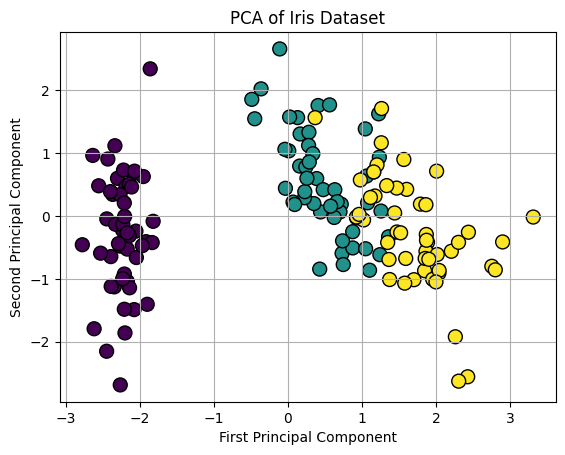

In [67]:
# Visualization:
from sklearn.preprocessing import LabelEncoder

# string labels are converted to numerical values
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)  # y_numeric is numerical

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA of Iris Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid(True)
plt.show()

## Lab Exercise 2: PCA for Image Compression

In [68]:
# Load an Image:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import io, color

image = io.imread('/content/img1.jpeg.jpg')
gray_image = color.rgb2gray(image)

In [69]:
# Reshape the Image:
m, n = gray_image.shape
X = gray_image.reshape(m, n)

In [70]:
# Apply PCA:
def apply_pca(X, n_components):
    pca = PCA(n_components=n_components)
    X_transformed = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_transformed)
    return X_reconstructed

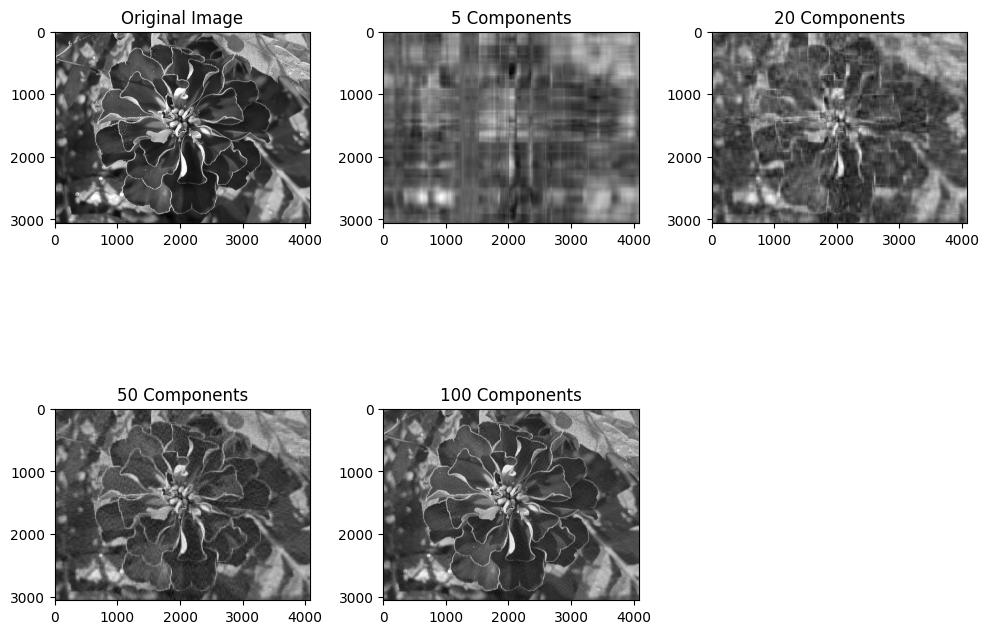

In [71]:
# Reconstruction and Visualize Results:
components = [5, 20, 50, 100]

plt.figure(figsize=(10, 8))
plt.subplot(2, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

for i, n_comp in enumerate(components, 2):
    X_reconstructed = apply_pca(X, n_comp)
    plt.subplot(2, 3, i)
    plt.imshow(X_reconstructed, cmap='gray')
    plt.title(f'{n_comp} Components')

plt.tight_layout()
plt.show()

## Lab Exercise 3: PCA for Feature Reduction in a Classification Task

In [72]:
# Load a Dataset:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

data = pd.read_csv('/content/winequality-white.csv')

X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Labels

In [76]:
# Split the Data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
# Step 3: Baseline Model (No PCA)
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_scaled, y_train)

# Evaluate the baseline model
y_pred_baseline = log_reg.predict(X_test_scaled)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
precision_baseline = precision_score(y_test, y_pred_baseline, average='weighted',zero_division=1)
recall_baseline = recall_score(y_test, y_pred_baseline, average='weighted',zero_division=1)

print(f"Baseline Model (No PCA): Accuracy = {accuracy_baseline:.2f}, Precision = {precision_baseline:.2f}, Recall = {recall_baseline:.2f}")

Baseline Model (No PCA): Accuracy = 0.54, Precision = 0.52, Recall = 0.54


In [84]:
# Apply PCA and Train and Evaluate:
components = [2, 5, 10]
accuracies = []

for n_comp in components:
    # Apply PCA
    pca = PCA(n_components=n_comp)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train Logistic Regression on PCA-reduced data
    log_reg_pca = LogisticRegression(max_iter=10000)
    log_reg_pca.fit(X_train_pca, y_train)

    # Evaluate the model
    y_pred_pca = log_reg_pca.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    accuracies.append(accuracy_pca)

    print(f"PCA with {n_comp} components: Accuracy = {accuracy_pca:.2f}")

PCA with 2 components: Accuracy = 0.46
PCA with 5 components: Accuracy = 0.50
PCA with 10 components: Accuracy = 0.53


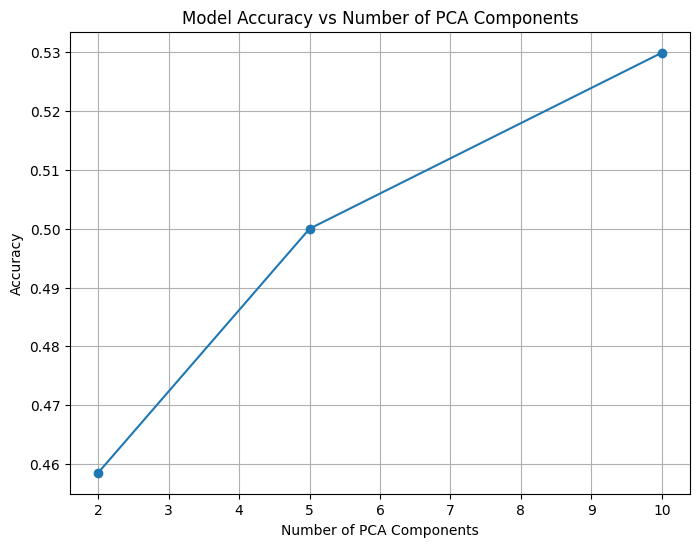

In [85]:
# Visualization:
plt.figure(figsize=(8, 6))
plt.plot(components, accuracies, marker='o')
plt.title('Model Accuracy vs Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()